In [19]:
import pandas as pd
import imageio
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [74]:
header_names = ['image', 'popularity', "partial_faces", "is_female", "baby", "child", "teenager", "youth", "middle_age", "senior", "white", "black", "asian", "oval_face", "round_face", "heart_face", "smiling", "mouth_open", "frowning", "wearing_glasses", "wearing_sunglasses", "wearing_lipstick", "tongue_out", "duck_face", "black_hair", "blond_hair", "brown_hair", "red_hair", "curly_hair", "straight_hair", "braid_hair", "showing_cellphone", "using_earphone", "using_mirror", "braces", "wearing_hat", "harsh_lighting", "dim_lighting"]
d = pd.read_csv('selfie_dataset.txt', sep=' ',header=None, names=header_names)
d = d[['image','popularity',"is_female", "baby", "child", "teenager", "youth", "middle_age", "senior"]]
cols = ['popularity',"is_female", "baby", "child", "teenager", "youth", "middle_age", "senior"]

In [33]:
sns.set_style('dark')

In [28]:
def fetch_image(filename):
    return imageio.imread("images/{}.jpg".format(filename))

In [65]:
def draw_samples(df, title):
    fig, axes = plt.subplots(2,5, subplot_kw={'xticks': [], 'yticks': []},figsize=(20,10))
    axes = axes.ravel()
    fig.suptitle(title)
    for row,ax in zip(df.iterrows(),axes):
        ax.imshow(fetch_image(row[1][0]))
        ax.set_xlabel("{:.2f}".format(row[1][1]))
        
#        [j  for i,j in zip(rows[1][2:], cols) if i ==1]

    plt.show()

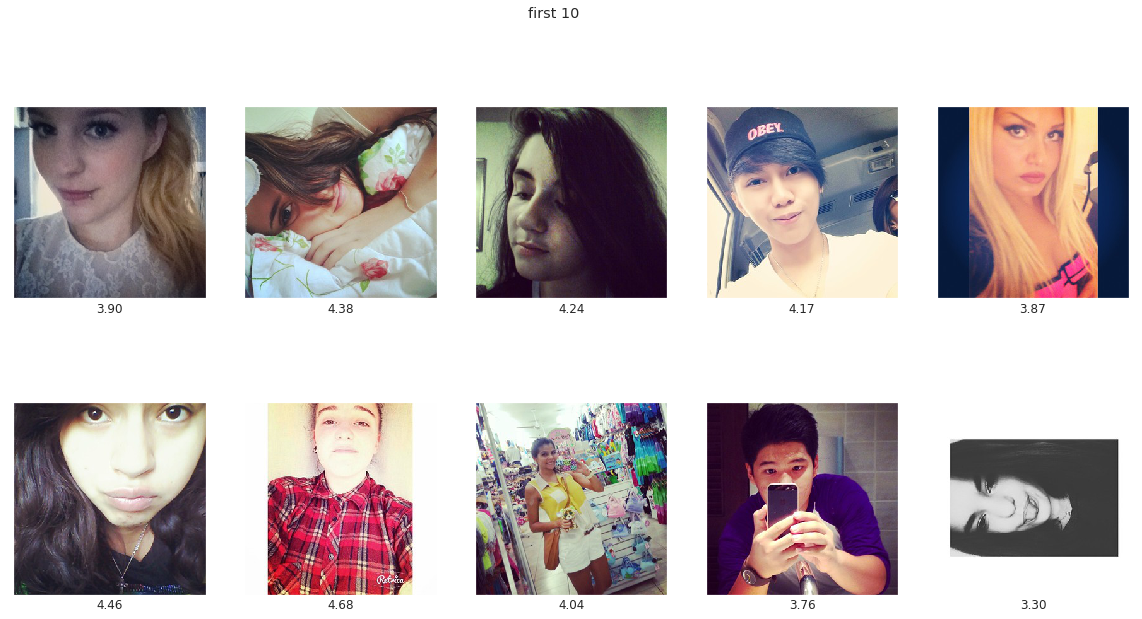

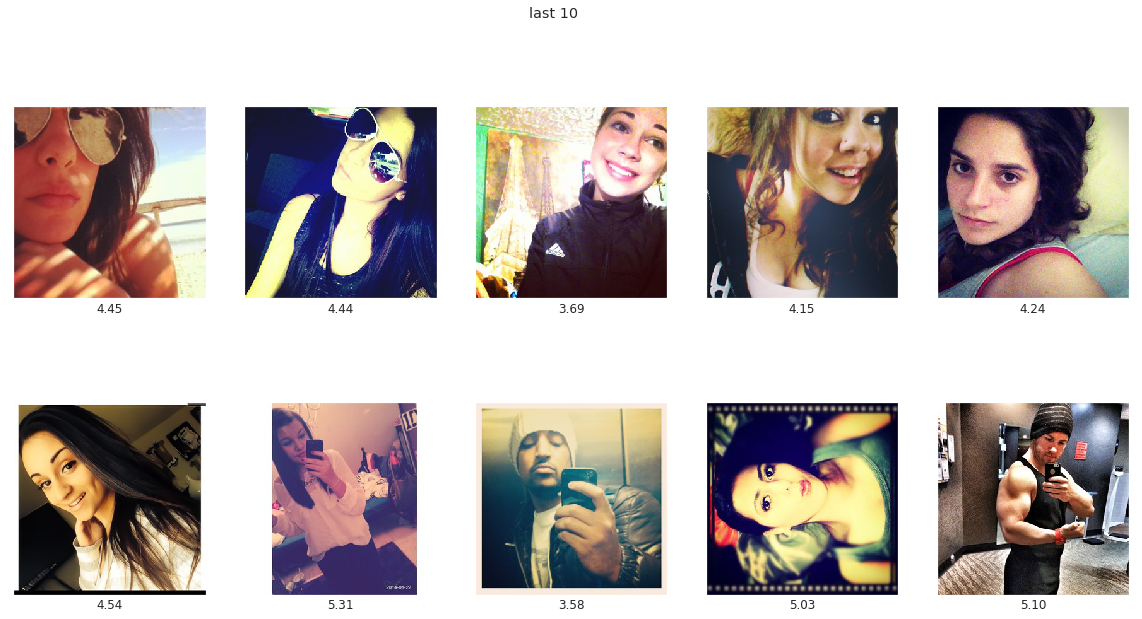

In [66]:
draw_samples(d.head(10),'first 10')
draw_samples(d.tail(10), 'last 10')

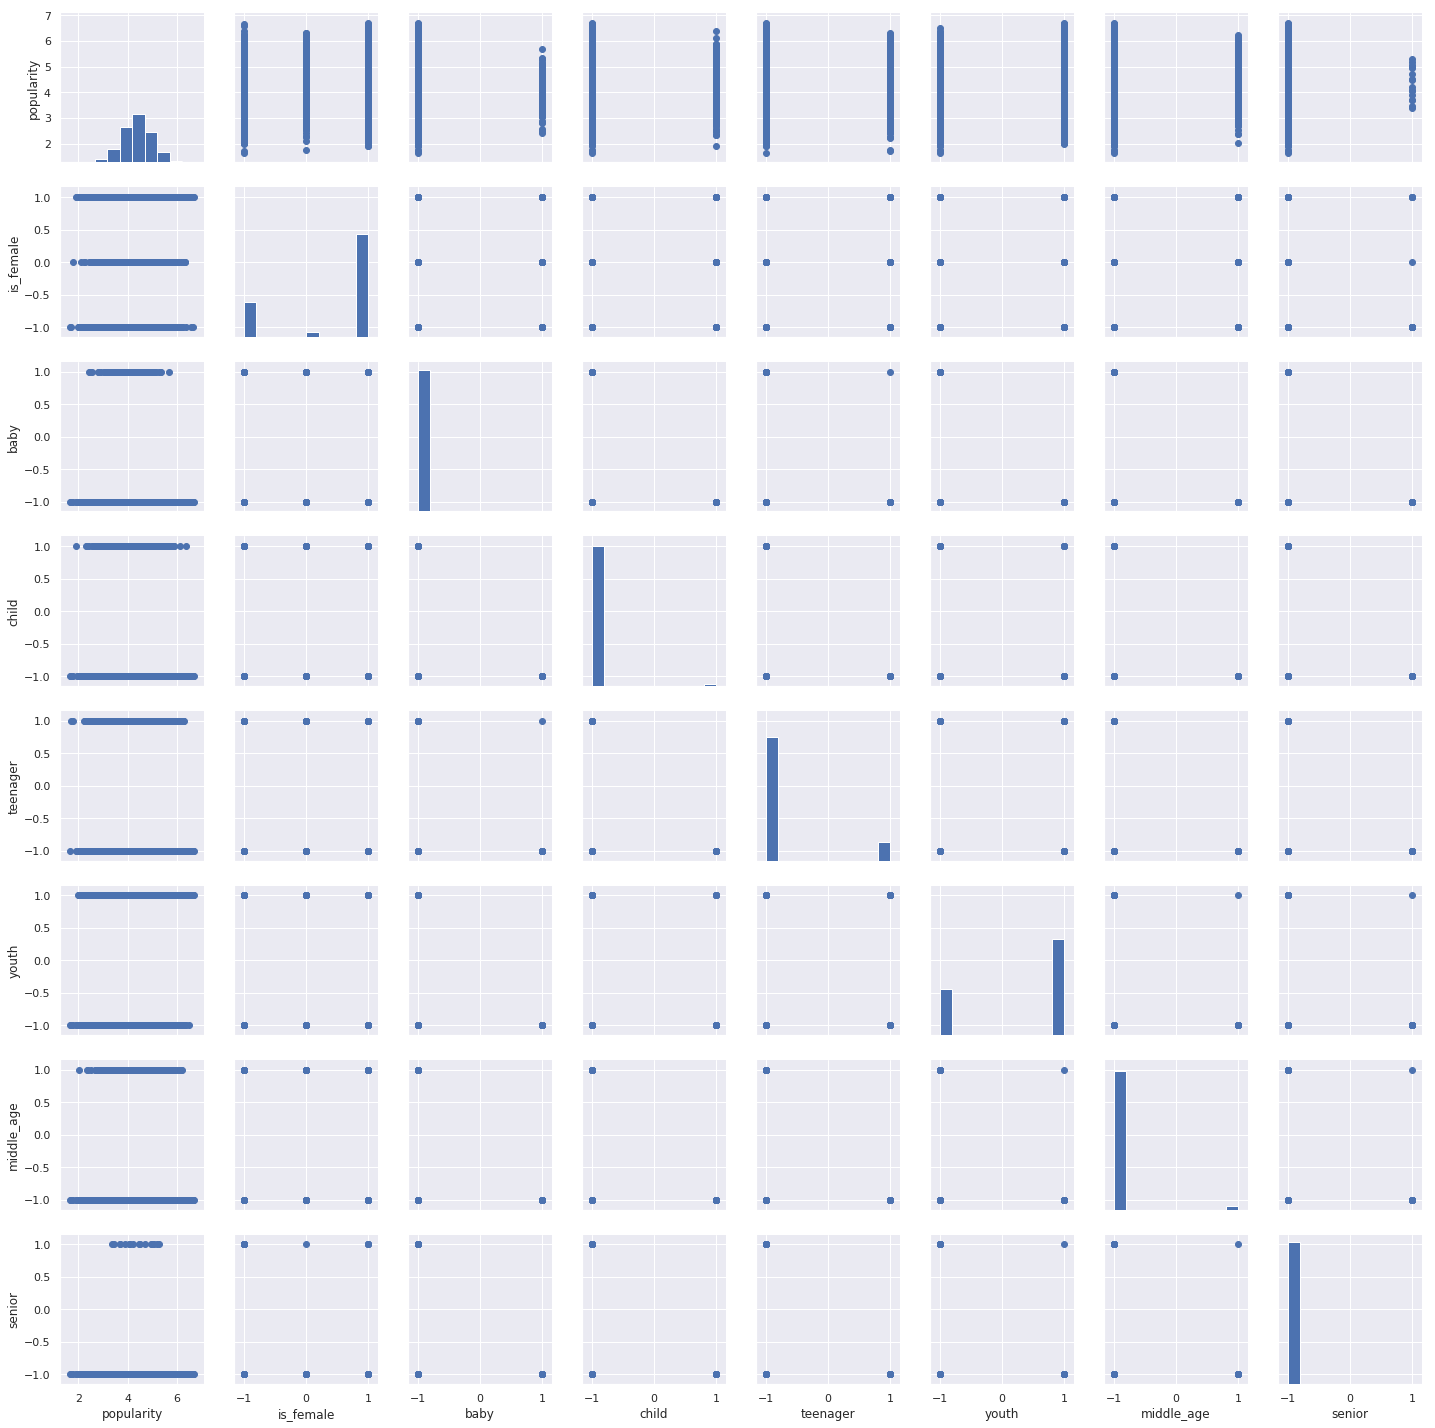

In [27]:
g = sns.PairGrid(data=d)
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)

In [42]:
g.savefig('pairplots.png')

/home/hybrid/.virtualenvs/tensorflow/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


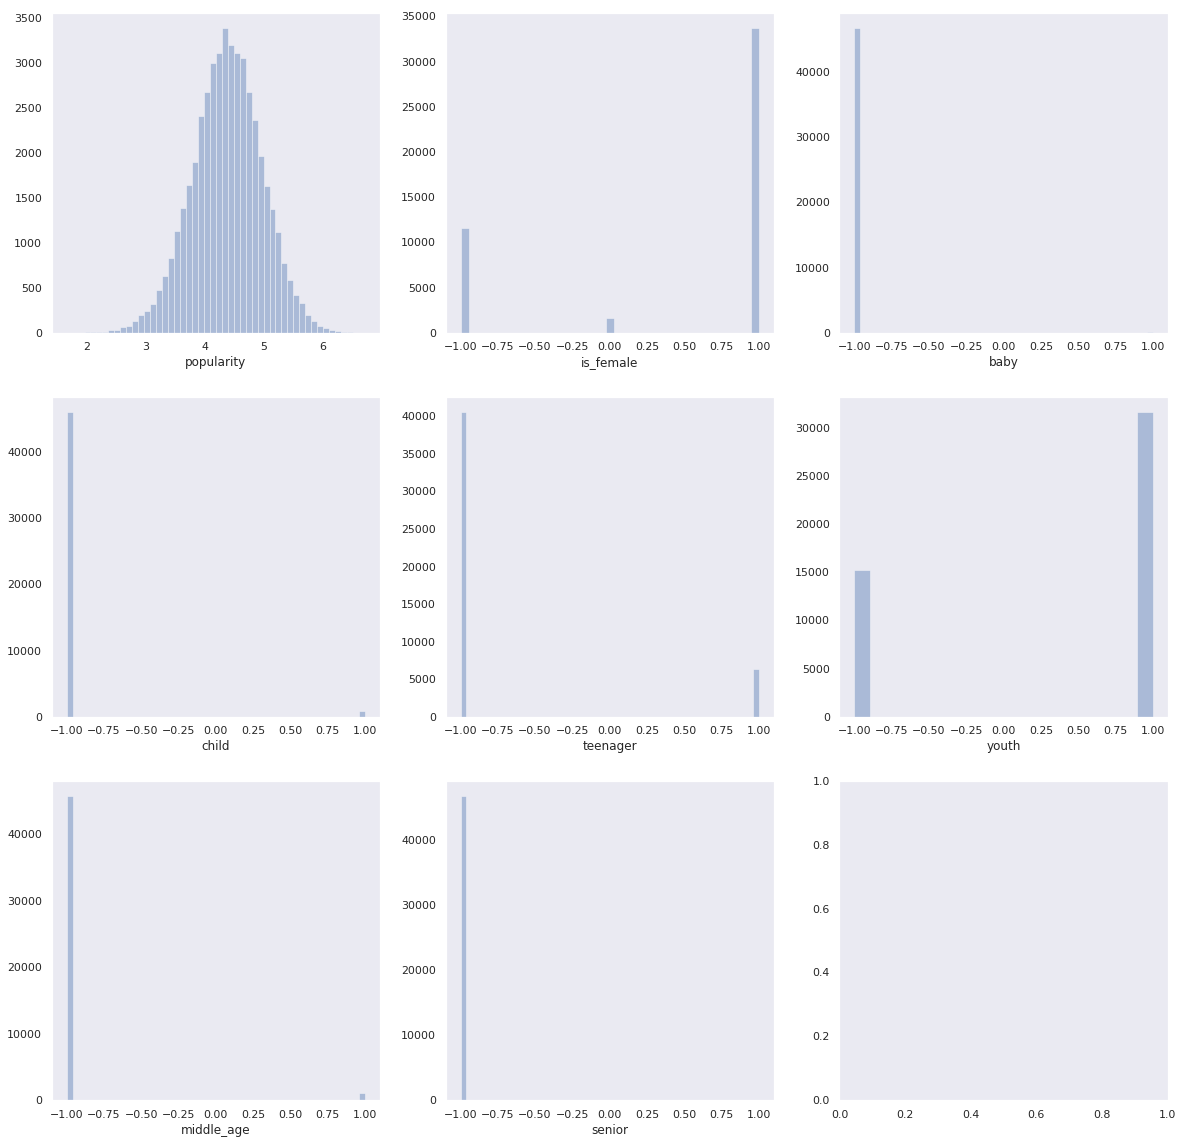

In [110]:
fig, axes = plt.subplots(3,3, figsize=(20,20))
axes = axes.ravel()
for col, ax in zip(cols, axes):
    sns.distplot(d[col], ax=ax, kde=False)

plt.savefig('hist.png')
plt.show()


In [107]:
from prettytable import PrettyTable

table = PrettyTable(field_names=['col','-1','0','1','ratio'])


for col in cols[1:]:
    ser = d[col]
    row = []
    unique, counts = np.unique(ser, return_counts=True)
    if counts.shape[0] == 2:
        row = ([col, counts[0],0,counts[1]])
    else:
        row = ([col,*counts])
    
    ratio = row[1]/row[3]
    if ratio < 1:
        ratio = 1/ ratio
    row.append(ratio)
    table.add_row(row)

In [108]:
print(table)

+------------+-------+------+-------+--------------------+
|    col     |   -1  |  0   |   1   |       ratio        |
+------------+-------+------+-------+--------------------+
| is_female  | 11572 | 1609 | 33655 | 2.908313169720014  |
|    baby    | 46640 |  0   |  196  | 237.9591836734694  |
|   child    | 46040 |  0   |  796  |  57.8391959798995  |
|  teenager  | 40561 |  0   |  6275 |  6.46390438247012  |
|   youth    | 15192 |  0   | 31644 | 2.0829383886255926 |
| middle_age | 45717 |  0   |  1119 | 40.85522788203753  |
|   senior   | 46820 |  0   |   16  |      2926.25       |
+------------+-------+------+-------+--------------------+


In [68]:
import numpy as np